In [ ]:
### import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps

from lsst.rsp import get_tap_service, retrieve_query

service = get_tap_service("ssotap")

In [242]:
params = {
   'axes.labelsize': 18,
   'font.size': 18,
   'legend.fontsize': 14,
   #   'xtick.labelsize': 16,
   'xtick.major.width': 3,
   'xtick.minor.width': 2,
   'xtick.major.size': 8,
   'xtick.minor.size': 5,
   'xtick.direction': 'in',
   'xtick.top': True,
   'lines.linewidth':3,
   'axes.linewidth':3,
   'axes.labelweight':3,
   'axes.titleweight':3,
   'ytick.major.width':3,
   'ytick.minor.width':2,
   'ytick.major.size': 8,
   'ytick.minor.size': 5,
   'ytick.direction': 'in',
   'ytick.right': True,
   #   'ytick.labelsize': 20,
   'text.usetex': False,
   # 'text.latex.preamble': r'\boldmath',
   'figure.figsize': [5, 5],
   'figure.facecolor': 'white'
   }

plt.rcParams.update(params)

In [201]:
query = "SELECT * FROM tap_schema.schemas"
results = service.search(query)
print(type(results))

results = service.search(query).to_table().to_pandas()
results

<class 'pyvo.dal.tap.TAPResults'>


,description,schema_index,schema_name,utype
0,Data Preview 0.3 contains the catalog products...,0,dp03_catalogs,
1,A TAP-standard-mandated schema to describe tab...,100000,tap_schema,
2,UWS Metadata,120000,uws,


In [202]:
schema_names = results['schema_name']
for name in schema_names:
    if name.find('dp03') > -1:
        dp03_schema_name = name
        break
print("DP0.3 schema is " + dp03_schema_name)

DP0.3 schema is dp03_catalogs


In [203]:
query = "SELECT * FROM tap_schema.tables " \
        "WHERE tap_schema.tables.schema_name = '" \
        + dp03_schema_name + "' order by table_index ASC"
print(query)

results = service.search(query)
results = results.to_table()
results

SELECT * FROM tap_schema.tables WHERE tap_schema.tables.schema_name = 'dp03_catalogs' order by table_index ASC


description,schema_name,table_index,table_name,table_type,utype
str512,str512,int32,str64,str8,str512
The orbit catalog produced by the Minor Planet Center. Ingested daily. O(10M) rows by survey end. The columns are described at https://minorplanetcenter.net//iau/info/MPOrbitFormat.html,dp03_catalogs,0,dp03_catalogs.MPCORB,table,
"LSST-computed per-object quantities. 1:1 relationship with MPCORB. Recomputed daily, upon MPCORB ingestion.",dp03_catalogs,0,dp03_catalogs.SSObject,table,
"LSST-computed per-source quantities. 1:1 relationship with DIASource. Recomputed daily, upon MPCORB ingestion.",dp03_catalogs,0,dp03_catalogs.SSSource,table,
Table to store 'difference image sources'; - sources detected at SNR >=5 on difference images.,dp03_catalogs,0,dp03_catalogs.DiaSource,table,


### MPCORB table

In [204]:
results = service.search("SELECT column_name, datatype, description, unit from TAP_SCHEMA.columns "
                         "WHERE table_name = 'dp03_catalogs.MPCORB'")
results.to_table().to_pandas()

,column_name,datatype,description,unit
0,arc,float,"MPCORB: Arc (days), for single-opposition objects",days
1,arcEnd,char,MPCORB: Year of last observation (for multi-op...,
2,arcStart,char,MPCORB: Year of first observation (for multi-o...,
3,computer,char,MPCORB: Computer name,
4,e,double,MPCORB: Orbital eccentricity,
5,epoch,double,"MPCORB: Epoch (in MJD, .0 TT)",MJD
6,flags,int,MPCORB: 4-hexdigit flags. See https://minorpla...,
7,fullDesignation,char,MPCORB: Readable designation,
8,incl,double,"MPCORB: Inclination to the ecliptic, J2000.0 (...",degrees
9,lastIncludedObservation,float,MPCORB: Date of last observation included in o...,MJD


In [238]:
df_mpcorb = service.search("SELECT TOP 10000 * FROM dp03_catalogs.MPCORB").to_table().to_pandas()
# df_mpcorb.columns

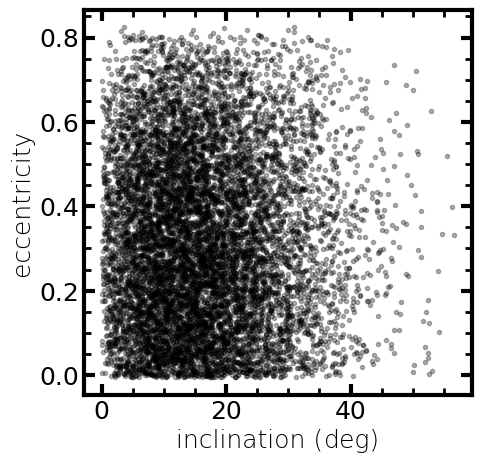

In [243]:
plt.plot(df_mpcorb['incl'], df_mpcorb['e'], 'k.', alpha=0.3)
plt.xlabel('inclination (deg)')
plt.ylabel('eccentricity')
plt.minorticks_on()
plt.show()

### SSObject table

In [207]:
results = service.search("SELECT column_name, datatype, description, unit from TAP_SCHEMA.columns "
                         "WHERE table_name = 'dp03_catalogs.SSObject'")
results.to_table().to_pandas()

,column_name,datatype,description,unit
0,arc,float,Arc of LSST observations,days
1,discoverySubmissionDate,double,The date the LSST first linked and submitted t...,date
2,firstObservationDate,double,The time of the first LSST observation of this...,date
3,flags,long,"Flags, bitwise OR tbd.",
4,gChi2,float,Chi^2 statistic of the phase curve fit (g band),
5,gG12,float,Best fit G12 slope parameter (g band),mag
6,gG12Err,float,Uncertainty of G12 (g band),mag
7,gH,float,Best fit absolute magnitude (g band),mag
8,gH_gG12_Cov,float,H-G12 covariance (g band),mag^2
9,gHErr,float,Uncertainty of H (g band),mag


In [246]:
df_ssobj = service.search("SELECT TOP 10000 * FROM dp03_catalogs.SSObject").to_table().to_pandas()

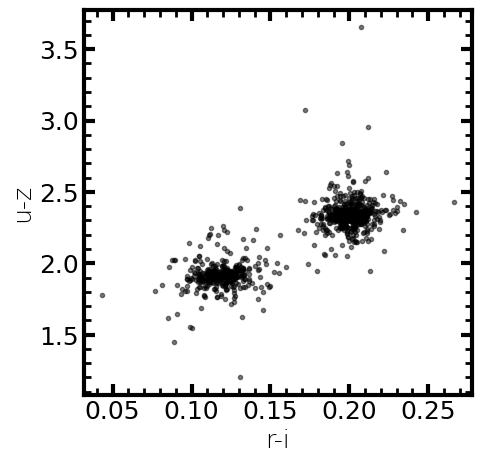

In [247]:
plt.plot(df_ssobj['rH']-df_ssobj['iH'], df_ssobj['uH']-df_ssobj['zH'], 'k.', alpha=0.5)
plt.xlabel('r-i')
plt.ylabel('u-z')
plt.minorticks_on()
plt.show()

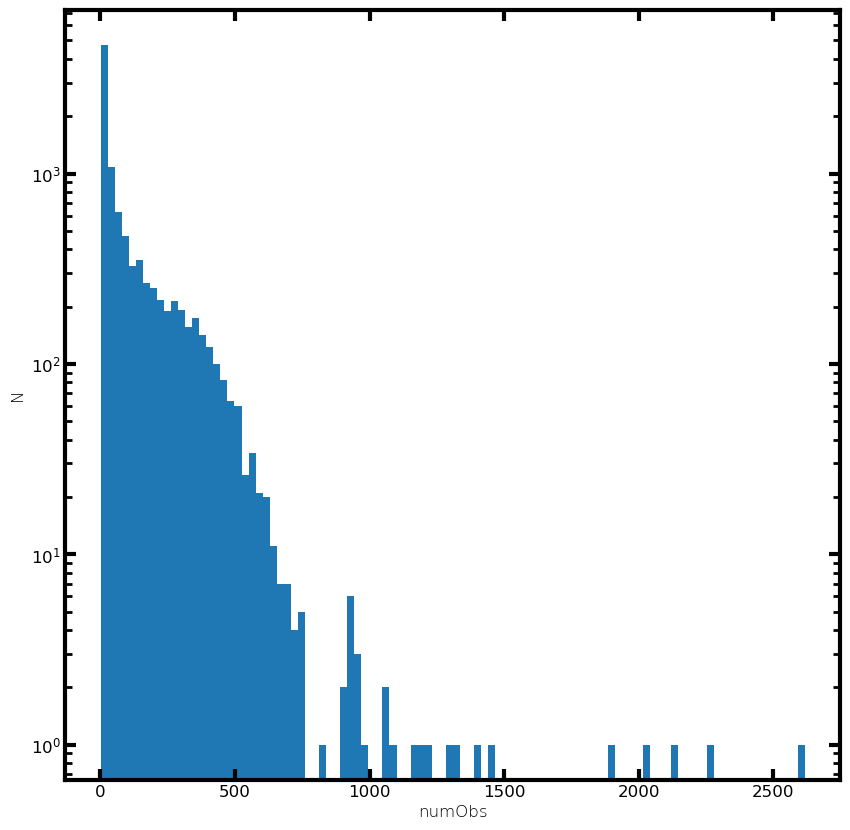

In [542]:
plt.hist(df_ssobj['numObs'], bins=100)
plt.xlabel('numObs')
plt.ylabel('N')
plt.semilogy()
plt.show()

### SSSource table

In [211]:
results = service.search("SELECT column_name, datatype, description, unit from TAP_SCHEMA.columns "
                         "WHERE table_name = 'dp03_catalogs.SSSource'")
results.to_table().to_pandas()

,column_name,datatype,description,unit
0,diaSourceId,long,Unique identifier of the observation,
1,eclipticBeta,double,Ecliptic latitude,deg
2,eclipticLambda,double,Ecliptic longitude,deg
3,galacticB,double,Galactic latitute,deg
4,galacticL,double,Galactic longitude,deg
5,heliocentricDist,float,Heliocentric distance,AU
6,heliocentricVX,float,Cartesian heliocentric velocities (at the emit...,AU
7,heliocentricVY,float,,AU
8,heliocentricVZ,float,,AU
9,heliocentricX,float,Cartesian heliocentric coordinates (at the emi...,AU


In [212]:
df_sssrc = service.search("SELECT TOP 10000 * FROM dp03_catalogs.SSSource").to_table().to_pandas()

In [213]:
totvel = np.sqrt((df_sssrc['heliocentricVX']**2) + (df_sssrc['heliocentricVY']**2) +\
                 (df_sssrc['heliocentricVZ']**2))

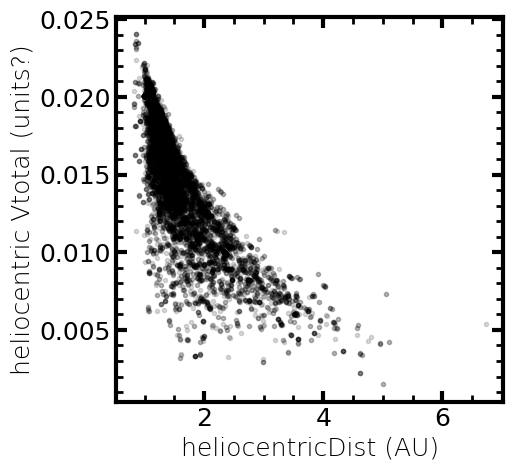

In [249]:
plt.plot(df_sssrc['heliocentricDist'], totvel, 'k.', alpha=0.15)
plt.xlabel('heliocentricDist (AU)')
plt.ylabel('heliocentric Vtotal (units?)')
plt.minorticks_on()
plt.show()

### DiaSource table

In [215]:
results = service.search("SELECT column_name, datatype, description, unit from TAP_SCHEMA.columns "
                         "WHERE table_name = 'dp03_catalogs.DiaSource'")
results.to_table().to_pandas()

,column_name,datatype,description,unit
0,_decTrue,double,,
1,_magTrue,float,,
2,_name,char,,
3,_raTrue,double,,
4,_V,float,,
5,ccdVisitId,long,Id of the ccdVisit where this diaSource was me...,
6,decl,double,Decl-coordinate of the center of this diaSource.,deg
7,declSigma,float,Uncertainty of decl.,deg
8,diaObjectId,long,Id of the diaObject this source was associated...,
9,diaSourceId,long,Unique id.,


In [216]:
df_diasrc = service.search("SELECT TOP 10000 * FROM dp03_catalogs.DiaSource").to_table().to_pandas()

In [217]:
uniq_ssobj = df_diasrc.ssObjectId.unique()

In [218]:
df_diasrc.loc[df_diasrc.ssObjectId == uniq_ssobj[3]]

,_decTrue,_magTrue,_name,_raTrue,_V,ccdVisitId,decl,declSigma,diaObjectId,diaSourceId,filter,mag,magSigma,midPointTai,ra,ra_decl_Cov,raSigma,snr,ssObjectId,ssObjectReassocTime
5,-9.789596,23.132401,S00014tVa,181.054103,23.533400,507266,-9.789580,0.000016,6082686414975846820,-8614096318099884537,z,22.991333,0.202532,61108.347708,181.054095,0.0,0.000016,4.876361,3997935650217601095,61108.34770827481
6,-9.785533,23.076826,S00014tVa,181.059523,23.531826,507316,-9.785558,0.000014,7928157112720290375,3722961249848731838,i,23.237286,0.158995,61108.371515,181.059513,0.0,0.000014,6.340930,3997935650217601095,61108.37151469154


### Find objects with a lot (>6000) of observations

In [386]:
df_ssobj_gt6k = service.search("SELECT * FROM dp03_catalogs.SSObject \
                                WHERE numObs > 900").to_table().to_pandas()

In [387]:
len(df_ssobj_gt6k)

17733

Pick one of those objects and get its info from DiaSource

In [527]:
pick = df_ssobj_gt6k.sample(1)
objid = str(pick.ssObjectId.values[0])
# print(objid.values[0])

df_diasrc_sel = service.search("SELECT * FROM dp03_catalogs.DiaSource \
                                WHERE ssObjectId = " + objid).to_table().to_pandas()

In [528]:
# df_diasrc_sel

Plot lightcurves in all the bands for that SSObject:

In [529]:
filts = df_diasrc_sel['filter'].unique()
print(filts)

['r' 'i' 'g' 'z' 'y' 'u']


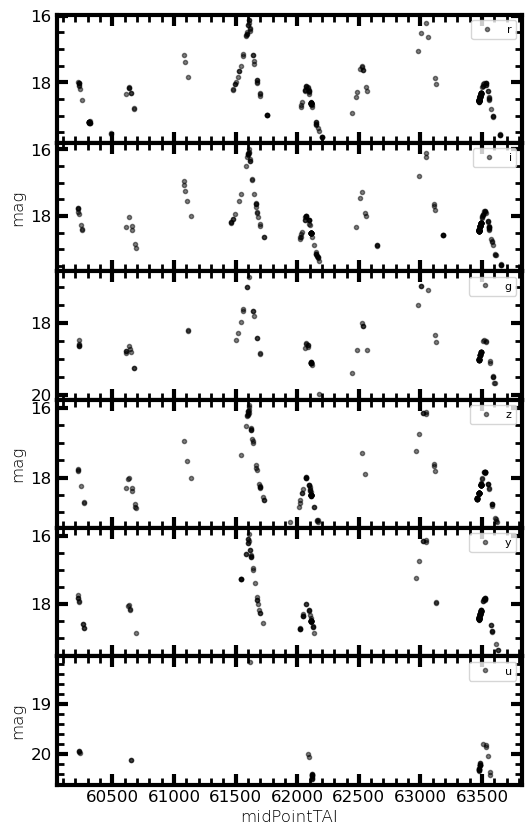

In [530]:
fig, axs = plt.subplots(len(filts), 1, figsize=(6, 10), sharex = True)
fig.subplots_adjust(hspace = 0)

axnum = 0
for filt in filts:
    pick_filt = df_diasrc_sel.loc[df_diasrc_sel['filter'] == filt]
    axs[axnum].plot(pick_filt['midPointTai'], pick_filt['mag'], 'k.', alpha=0.5, label=filt)
    axs[axnum].legend()
    axs[axnum].minorticks_on()
    # axs[axnum].set_xlim(60500, 61000)
    axs[axnum].invert_yaxis()
    if axnum%2:
        axs[axnum].set_ylabel('mag')
    axnum += 1

plt.xlabel('midPointTAI')
plt.show()

Get the SSSource data for the same SSObject:

In [531]:
#df_sssrc_sel = service.search("SELECT * FROM dp03_catalogs.SSSource \
#                               WHERE ssObjectId = " + objid).to_table().to_pandas()
##                              WHERE ssObjectId = " + str(df_ssobj_gt6k.ssObjectId[1])).to_table().to_pandas()

In [532]:
#df_sssrc_sel

Join the DiaSource and SSSource tables for the selected object. (Join on `diaSourceId`.)

In [533]:
# allsrc_sel = df_diasrc_sel.set_index('diaSourceId').join(df_sssrc_sel.set_index('diaSourceId'), on='diaSourceId', lsuffix='_1', rsuffix='_2', how='outer')

In [534]:
# allsrc_sel

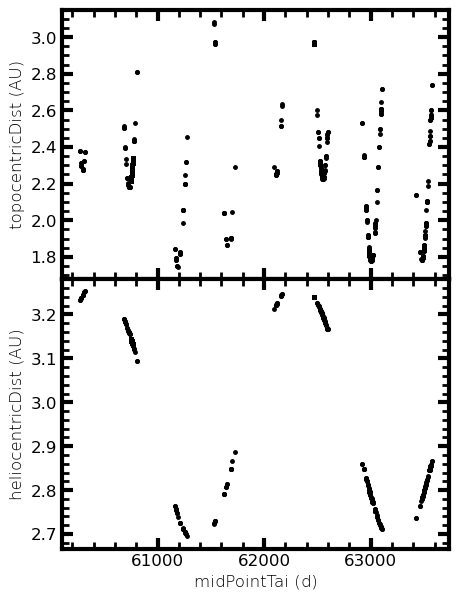

In [535]:
fig, axs = plt.subplots(2, 1, figsize=(5, 7), sharex=True)
fig.subplots_adjust(hspace = 0)

axs[0].plot(allsrc_sel['midPointTai'], allsrc_sel['topocentricDist'], 'k.', ms=5)
axs[0].set_ylabel('topocentricDist (AU)')
axs[0].minorticks_on()

axs[1].plot(allsrc_sel['midPointTai'], allsrc_sel['heliocentricDist'], 'k.', ms=5)
axs[1].set_ylabel('heliocentricDist (AU)')
axs[1].minorticks_on()
axs[1].set_xlabel('midPointTai (d)')
plt.show()

In [553]:
def xyz_orbit_plot(tobs, x, y, z):
    params = {
       'axes.labelsize': 12,
       'font.size': 12,
       'legend.fontsize': 8,
       #   'xtick.labelsize': 16,
       'xtick.major.width': 3,
       'xtick.minor.width': 2,
       'xtick.major.size': 8,
       'xtick.minor.size': 5,
       'xtick.direction': 'in',
       'xtick.top': True,
       'lines.linewidth':3,
       'axes.linewidth':3,
       'axes.labelweight':3,
       'axes.titleweight':3,
       'ytick.major.width':3,
       'ytick.minor.width':2,
       'ytick.major.size': 8,
       'ytick.minor.size': 5,
       'ytick.direction': 'in',
       'ytick.right': True,
       #   'ytick.labelsize': 20,
       'text.usetex': False,
       # 'text.latex.preamble': r'\boldmath',
       'figure.figsize': [10, 10],
       'figure.facecolor': 'white'
       }
    
    plt.rcParams.update(params)

    dist = np.sqrt(x**2 + y**2 + z**2)
    
    fig = plt.figure()

    # fig, axs = plt.subplots(2, 2, figsize=(7, 7), sharex=True, sharey=True)
    #fig.subplots_adjust(hspace=0, wspace=0)

    ax1=plt.subplot(221)
    # plt.sca(ax[0][0])
    ax1.plot(x, z, 'k.', ms=5)
    ax1.set_ylabel('Z (AU)')
    ax1.set_xlabel('X (AU)')
    ax1.minorticks_on()

    ax2=plt.subplot(222, sharey=ax1)
    # plt.sca(ax[0][1])
    ax2.plot(y, z, 'k.', ms=5)
    ax2.set_xlabel('Y (AU)')
    ax2.set_ylabel('Z (AU)')
    ax2.minorticks_on()
    plt.setp(ax2.get_yticklabels(), visible=False)

    ax3=plt.subplot(223, sharex=ax1)
    #plt.sca(ax[1][0])
    ax3.plot(x, y, 'k.', ms=5)
    ax3.set_ylabel('Y (AU)')
    ax3.set_xlabel('X (AU)')
    ax3.minorticks_on()

    ax4=plt.subplot(224)
    # plt.sca(ax[1][1])
    ax4.plot((tobs-np.min(tobs))/365.25, dist, 'k.', ms=5)
    ax4.set_xlabel('midPointTai (yr)')
    ax4.set_ylabel('dist (AU)')
    ax4.set_aspect(aspect=3.0)
    ax4.minorticks_on()

    plt.show()

In [537]:
# xyz_orbit_plot(allsrc_sel['midPointTai'], allsrc_sel['heliocentricX'],
#                allsrc_sel['heliocentricY'], allsrc_sel['heliocentricZ'])

In [601]:
def get_obj_matched(objid):

    df_diasrc_tmp = service.search("SELECT * FROM dp03_catalogs.DiaSource \
                                    WHERE ssObjectId = " + str(objid)).to_table().to_pandas()
    df_sssrc_tmp = service.search("SELECT * FROM dp03_catalogs.SSSource \
                                   WHERE ssObjectId = " + str(objid)).to_table().to_pandas()
    allsrc_tmp = df_diasrc_tmp.set_index('diaSourceId').join(df_sssrc_tmp.set_index('diaSourceId'),
                                                             on='diaSourceId', lsuffix='_1',
                                                             rsuffix='_2', how='outer')
    return allsrc_tmp

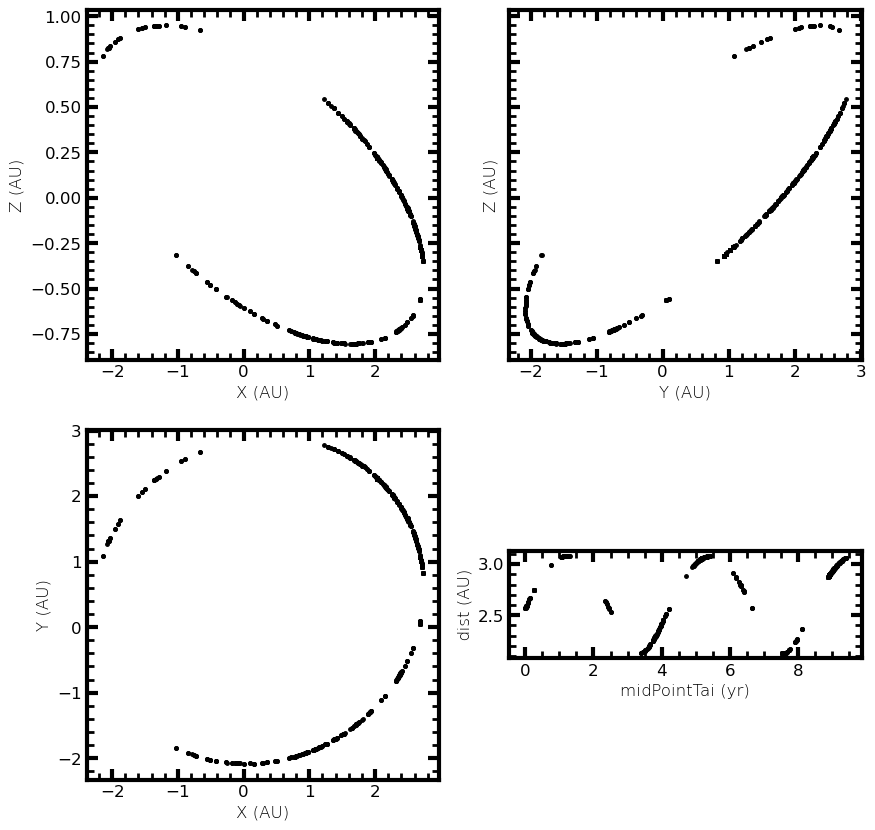

In [602]:
id_src = objid # df_ssobj_gt6k.ssObjectId[3]

src_cat = get_obj_matched(id_src)

xyz_orbit_plot(src_cat['midPointTai'], src_cat['heliocentricX'],
               src_cat['heliocentricY'], src_cat['heliocentricZ'])

### Find objects with close approaches to Earth

In [663]:
import astropy.units as u

small_dist = 0.001*u.au
print(small_dist.to(u.km))

149597.8707 km


In [649]:
#df_sssrc_close = service.search("SELECT Min(topocentricDist) FROM dp03_catalogs.SSSource")
df_sssrc_close = service.search("SELECT * FROM dp03_catalogs.SSSource \
                                 WHERE topocentricDist < 0.01").to_table().to_pandas()

In [650]:
df_sssrc_close.sort_values('topocentricDist')

,diaSourceId,eclipticBeta,eclipticLambda,galacticB,galacticL,heliocentricDist,heliocentricVX,heliocentricVY,heliocentricVZ,heliocentricX,...,residualDec,residualRa,ssObjectId,topocentricDist,topocentricVX,topocentricVY,topocentricVZ,topocentricX,topocentricY,topocentricZ
50,619563191735275740,-17.693747,24.032770,-64.985016,162.835536,0.986380,-0.010757,0.009748,0.010788,0.272907,...,NaN,NaN,-7949591716344073506,0.001674,0.006163,0.005249,0.008930,0.001457,0.000799,-0.000208
49,2642747159222004465,-9.991898,28.676132,-56.732936,155.799621,0.986666,-0.010759,0.009740,0.010785,0.272590,...,NaN,NaN,-7949591716344073506,0.001897,0.006200,0.005270,0.008930,0.001639,0.000953,0.000055
15,-4651313434724905279,-22.790192,238.809304,12.825124,330.347587,1.018830,0.020808,-0.003926,-0.002974,-0.005359,...,NaN,NaN,-6434530465133609085,0.003256,0.003661,-0.003883,-0.002920,-0.001554,-0.001854,-0.002178
16,4489038842240719533,-22.791863,238.856565,12.790875,330.375261,1.018832,0.020808,-0.003925,-0.002974,-0.005350,...,NaN,NaN,-6434530465133609085,0.003257,0.003661,-0.003883,-0.002920,-0.001553,-0.001856,-0.002180
0,55953449659231296,-15.106331,280.528860,-16.397458,358.076425,1.006834,0.004079,0.013557,-0.004344,0.996288,...,NaN,NaN,1476331724896856253,0.003273,0.001736,-0.002144,-0.011094,0.000577,-0.002511,-0.002018
35,4379419903619440746,-4.895105,182.868702,55.186339,281.354121,1.014123,0.007621,-0.013601,0.001984,-0.488923,...,NaN,NaN,8313305041332091305,0.003285,-0.007258,-0.005742,0.005292,-0.003269,-0.000039,-0.000322
1,3333365293243158285,-17.953151,280.754274,-17.874472,355.519562,1.006893,0.004072,0.013558,-0.004344,0.996385,...,NaN,NaN,1476331724896856253,0.003487,0.001757,-0.002172,-0.011095,0.000619,-0.002562,-0.002282
27,7686738999264964086,-42.767237,35.037085,-59.233620,220.953914,1.015623,0.013818,0.012291,0.009408,0.527694,...,NaN,NaN,-3001394484984815630,0.003770,-0.000580,0.003955,0.005893,0.002266,0.002476,-0.001717
33,-2867350792459981032,-45.783015,155.124300,11.101148,258.973968,0.985713,-0.017360,-0.011160,-0.005472,-0.379215,...,NaN,NaN,-3364441727545846004,0.004292,-0.001137,-0.004837,-0.002830,-0.002716,0.002379,-0.002322
31,-1004612068393895072,-45.765259,155.024565,11.091678,258.901445,0.985718,-0.017361,-0.011160,-0.005472,-0.379198,...,NaN,NaN,-3364441727545846004,0.004293,-0.001136,-0.004838,-0.002830,-0.002715,0.002383,-0.002319


In [651]:
#df_sssrc_close2 = service.search("SELECT diaSourceId, topocentricDist FROM dp03_catalogs.SSSource \
#                                  WHERE topocentricDist < 0.02 ORDER BY topocentricDist ASC", max=1).to_table().to_pandas()

In [616]:
df_sssrc_close

,diaSourceId,eclipticBeta,eclipticLambda,galacticB,galacticL,heliocentricDist,heliocentricVX,heliocentricVY,heliocentricVZ,heliocentricX,...,residualDec,residualRa,ssObjectId,topocentricDist,topocentricVX,topocentricVY,topocentricVZ,topocentricX,topocentricY,topocentricZ
0,8945026217383045852,-23.763289,151.437629,29.800087,246.076790,0.998514,-0.003395,-0.013214,-0.011382,-0.975524,...,NaN,NaN,6085057667993072295,0.006594,0.000575,0.002506,-0.004666,-0.005301,0.003704,-0.001290
1,713151542177789982,-63.599999,95.628327,-24.055373,247.398008,1.001482,0.017166,-0.008539,-0.010829,-0.869766,...,NaN,NaN,-8248427012303048879,0.018029,0.008906,0.005380,-0.004888,-0.000786,0.013743,-0.011643
2,-8497853358745931611,-44.492461,161.840660,13.864661,263.129554,1.001029,-0.014054,-0.015302,-0.002701,-0.819960,...,NaN,NaN,-9010019183805855224,0.019802,-0.003917,-0.002133,0.002911,-0.013422,0.009559,-0.010981
3,-6971281575378912968,-44.823071,161.654249,13.510146,263.093834,1.000964,-0.014060,-0.015298,-0.002700,-0.819634,...,NaN,NaN,-9010019183805855224,0.019802,-0.003884,-0.002126,0.002910,-0.013332,0.009609,-0.011049
4,-1884345540924955574,-12.228112,272.207739,-7.910218,356.779679,1.018938,0.013661,0.015148,0.006413,0.840044,...,NaN,NaN,3898189763720611434,0.011781,0.004131,0.001986,0.000762,0.000444,-0.009563,-0.006866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,6389751684349892325,12.055112,308.259995,-24.919006,38.498287,1.008285,-0.003056,0.012639,0.013714,1.007869,...,NaN,NaN,-6324037451538454719,0.009302,-0.002362,-0.003175,0.006902,0.005633,-0.007326,-0.001059
96,8817280082084993270,14.718205,305.401121,-21.073087,38.699580,1.007925,-0.004935,0.017007,0.011153,0.995260,...,NaN,NaN,-8935707438248718790,0.017414,-0.001841,0.001356,0.004443,0.009757,-0.014356,-0.001402
97,-7472849568179436786,-26.758741,140.836838,22.127582,238.863991,0.994249,-0.019870,0.002508,0.002662,-0.001692,...,NaN,NaN,-6263533633418845558,0.018685,-0.002271,0.002582,0.002608,-0.012936,0.013013,-0.003527
98,-3353637724497760947,-7.857016,117.926764,19.528867,208.123758,1.004000,0.008682,-0.017484,-0.007773,-0.850500,...,NaN,NaN,-8210393279984587016,0.018966,-0.000275,-0.004064,-0.002019,-0.008799,0.016262,0.004224


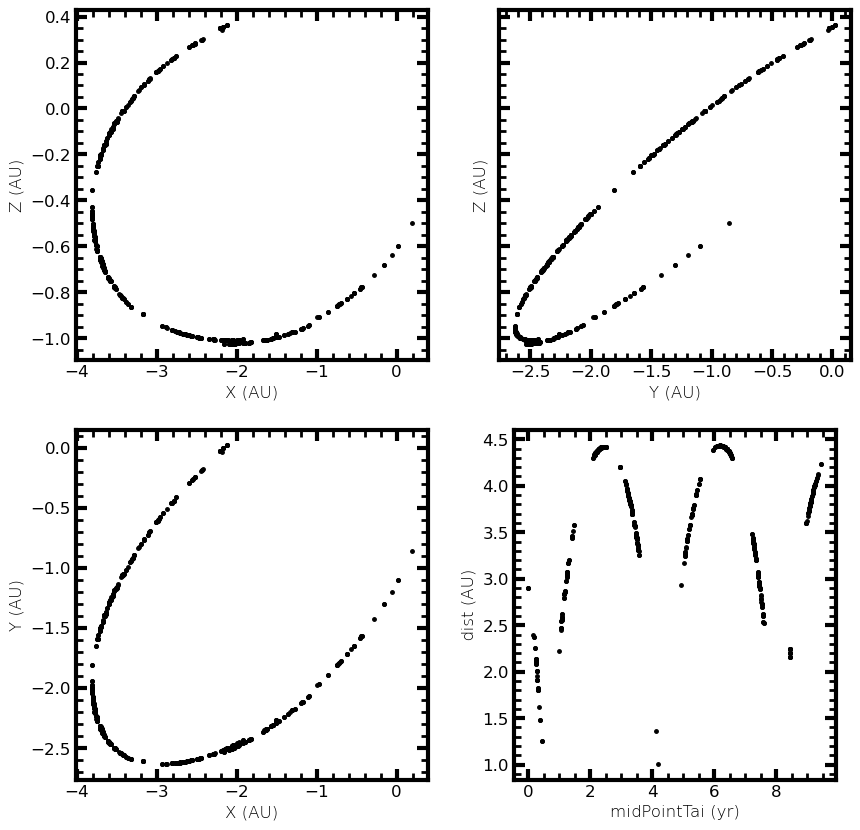

In [662]:
#pick_dino_smasher = df_sssrc_close.sample(1)
pick_dino_smasher = df_sssrc.sample(1)

objid_ds = pick_dino_smasher.ssObjectId.values[0]
id_src = objid_ds

src_cat_ds = get_obj_matched(id_src)

xyz_orbit_plot(src_cat_ds['midPointTai'], src_cat_ds['heliocentricX'],
               src_cat_ds['heliocentricY'], src_cat_ds['heliocentricZ'])

#xyz_orbit_plot(src_cat_ds['midPointTai'], src_cat_ds['topocentricX'],
#               src_cat_ds['topocentricY'], src_cat_ds['topocentricZ'])

In [613]:
dearth = np.sqrt(src_cat_ds['topocentricX']**2 + src_cat_ds['topocentricY']**2 + src_cat_ds['topocentricZ']**2)

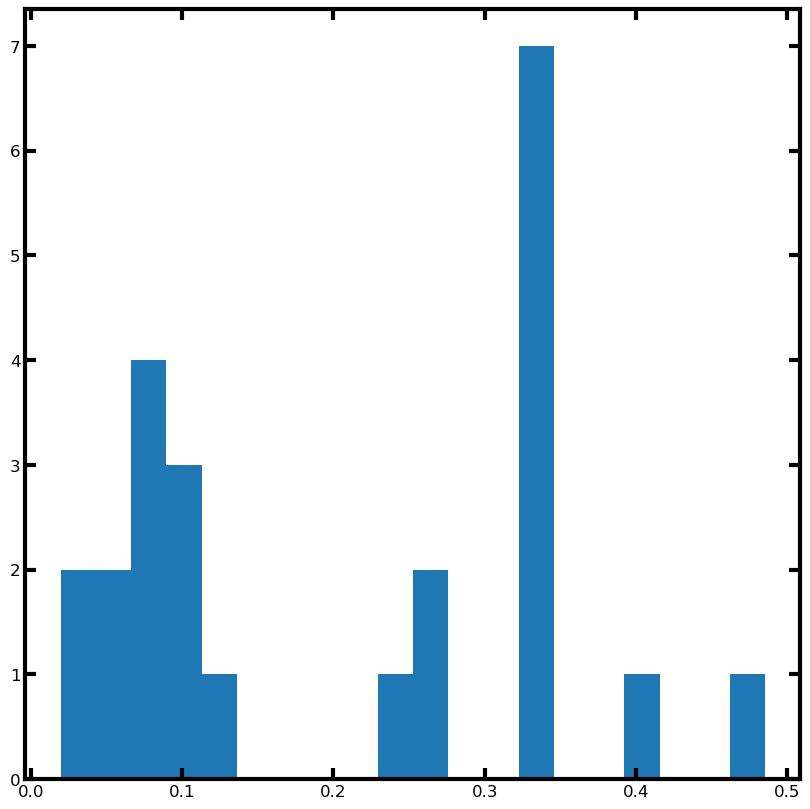

In [614]:
plt.hist(dearth, bins=20)
plt.show()

In [636]:
df_mpcorb = service.search("SELECT TOP 10000 * FROM dp03_catalogs.MPCORB WHERE incl > 75").to_table().to_pandas()

df_mpcorb

,arc,arcEnd,arcStart,computer,e,epoch,flags,fullDesignation,incl,lastIncludedObservation,...,nopp,peri,pertsLong,pertsShort,q,reference,rms,ssObjectId,tperi,uncertaintyParameter
0,NaN,,,,0.731208,54466.0,0,2011 S00003j5,75.000242,NaN,...,0,239.780473,,,0.463623,,NaN,161064992185555489,54580.274674,
1,NaN,,,,0.175998,54466.0,0,2011 S0000b3f,75.000640,NaN,...,0,100.472742,,,0.532316,,NaN,687250518016198407,54416.025224,
2,NaN,,,,0.651709,54466.0,0,2011 S0000evz,75.000689,NaN,...,0,295.963149,,,0.775684,,NaN,3659306464089042347,54643.487755,
3,NaN,,,,0.473847,54466.0,0,2011 S0000F98,75.001426,NaN,...,0,134.095804,,,0.439339,,NaN,7680092623481232123,54538.280974,
4,NaN,,,,0.387945,54466.0,0,2011 S00005RZ,75.001465,NaN,...,0,350.426014,,,0.805445,,NaN,2373875316463088686,54371.846646,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,NaN,,,,0.999530,54466.0,0,2011 SL00012C,178.116630,NaN,...,0,327.483890,,,9.354650,,NaN,5821974185694405325,57534.790370,
7995,NaN,,,,0.993210,54466.0,0,2011 SL0000pE,178.161510,NaN,...,0,296.669790,,,11.538900,,NaN,-2278472931293538919,55667.180330,
7996,NaN,,,,0.999880,54466.0,0,2011 SL0000la,178.314200,NaN,...,0,32.845770,,,2.442980,,NaN,669360351978771767,55123.948490,
7997,NaN,,,,0.999790,54466.0,0,2011 SL0000qG,179.018550,NaN,...,0,77.809430,,,1.922760,,NaN,-1686996354312660839,58288.382560,
